In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"D:\tutorials\xaltius sessions\CAPSTONE PROJECTS\Module 2 - Real Estate\Dataset\hdb_resale_flats.csv")
df

c:\users\iamli\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3258: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town,street_lat,street_lon,town_lat,town_lon
0,172,Improved,2 ROOM,45.0,1986,2012-03,NaN,250000.0,06 TO 10,ANG MO KIO AVE 4,ANG MO KIO,1.376494,103.839480,1.369115,103.845434
1,510,Improved,2 ROOM,44.0,1980,2012-03,NaN,265000.0,01 TO 05,ANG MO KIO AVE 8,ANG MO KIO,1.370511,103.848816,1.369115,103.845434
2,610,New Generation,3 ROOM,68.0,1980,2012-03,NaN,315000.0,06 TO 10,ANG MO KIO AVE 4,ANG MO KIO,1.376494,103.839480,1.369115,103.845434
3,474,New Generation,3 ROOM,67.0,1984,2012-03,NaN,320000.0,01 TO 05,ANG MO KIO AVE 10,ANG MO KIO,1.366942,103.856596,1.369115,103.845434
4,604,New Generation,3 ROOM,67.0,1980,2012-03,NaN,321000.0,06 TO 10,ANG MO KIO AVE 5,ANG MO KIO,1.375972,103.855936,1.369115,103.845434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141663,297,Improved,5 ROOM,112.0,2000,2016-12,82,488000.0,13 TO 15,YISHUN ST 20,YISHUN,1.435746,103.836004,1.430368,103.835363
141664,838,Improved,5 ROOM,122.0,1987,2016-12,69,455000.0,01 TO 03,YISHUN ST 81,YISHUN,1.415083,103.837331,1.430368,103.835363
141665,664,Apartment,EXECUTIVE,181.0,1992,2016-12,74,778000.0,10 TO 12,YISHUN AVE 4,YISHUN,1.418586,103.840672,1.430368,103.835363
141666,325,Maisonette,EXECUTIVE,146.0,1988,2016-12,70,575000.0,01 TO 03,YISHUN CTRL,YISHUN,1.426338,103.840547,1.430368,103.835363


In [3]:
round(df.describe(),2)

,floor_area_sqm,lease_commence_date,resale_price,street_lat,street_lon,town_lat,town_lon
count,141668.00,141668.00,141668.00,141668.00,141668.00,141668.00,141668.00
mean,97.05,1991.28,447101.51,1.37,103.84,1.36,103.84
std,24.51,11.24,138786.89,0.04,0.07,0.04,0.07
min,31.00,1966.00,160000.00,1.27,103.69,1.28,103.71
25%,74.00,1984.00,348000.00,1.34,103.77,1.33,103.79
50%,95.00,1989.00,420000.00,1.36,103.85,1.36,103.84
75%,112.00,2000.00,515000.00,1.39,103.90,1.39,103.89
max,280.00,2016.00,1200000.00,1.46,103.99,1.45,103.96


In [4]:
#check for null values

df.isnull().sum()

block                      0
flat_model                 0
flat_type                  0
floor_area_sqm             0
lease_commence_date        0
month                      0
remaining_lease        52203
resale_price               0
storey_range               0
street_name                0
town                       0
street_lat                 0
street_lon                 0
town_lat                   0
town_lon                   0
dtype: int64

In [5]:
# Determine Outliers based on resale_price through IQR Method

def outlier_treat(column):
    q3 = np.quantile(df[column], 0.75)
    q1 = np.quantile(df[column], 0.25)
    IQR = q3-q1
    lower_limit = q1 - (1.5*IQR)
    upper_limit = q3 + (1.5*IQR)
    print(f'q3: {q3}, q1: {q1}, IQR: {IQR}')
    print(f'Lower limit: {lower_limit}, Upper Limit: {upper_limit}')
    return df[ (df[column] < lower_limit) | (df[column] > upper_limit)]   # filters records where specified column value 
                                                                          #is less than lower limit or higher than upper limit

outlier_treat('resale_price')

q3: 515000.0, q1: 348000.0, IQR: 167000.0
Lower limit: 97500.0, Upper Limit: 765500.0


,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town,street_lat,street_lon,town_lat,town_lon
116,700A,Improved,5 ROOM,111.0,2003,2012-03,NaN,767000.0,16 TO 20,ANG MO KIO AVE 6,ANG MO KIO,1.376230,103.844818,1.369115,103.845434
117,700C,Improved,5 ROOM,111.0,2003,2012-03,NaN,775000.0,16 TO 20,ANG MO KIO AVE 6,ANG MO KIO,1.376230,103.844818,1.369115,103.845434
118,596D,Improved,5 ROOM,110.0,2003,2012-03,NaN,785000.0,21 TO 25,ANG MO KIO ST 52,ANG MO KIO,1.372473,103.853639,1.369115,103.845434
252,115,Adjoined flat,EXECUTIVE,176.0,1978,2012-03,NaN,790000.0,01 TO 05,BEDOK NTH RD,BEDOK,1.330681,103.930513,1.323604,103.927340
298,244,Maisonette,EXECUTIVE,147.0,1992,2012-03,NaN,775000.0,01 TO 05,BISHAN ST 22,BISHAN,1.357366,103.845248,1.352584,103.835212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141477,121,Improved,5 ROOM,124.0,2002,2016-12,84,880000.0,22 TO 24,LOR 2 TOA PAYOH,TOA PAYOH,1.336051,103.846299,1.334304,103.856326
141478,81B,Improved,5 ROOM,122.0,1997,2016-12,79,820888.0,13 TO 15,LOR 4 TOA PAYOH,TOA PAYOH,1.335624,103.850762,1.334304,103.856326
141481,104,Adjoined flat,EXECUTIVE,148.0,1984,2016-12,67,900000.0,13 TO 15,POTONG PASIR AVE 1,TOA PAYOH,1.334923,103.866947,1.334304,103.856326
141586,808,Apartment,EXECUTIVE,189.0,1994,2016-12,76,800000.0,10 TO 12,WOODLANDS ST 81,WOODLANDS,1.441476,103.789173,1.438192,103.788960


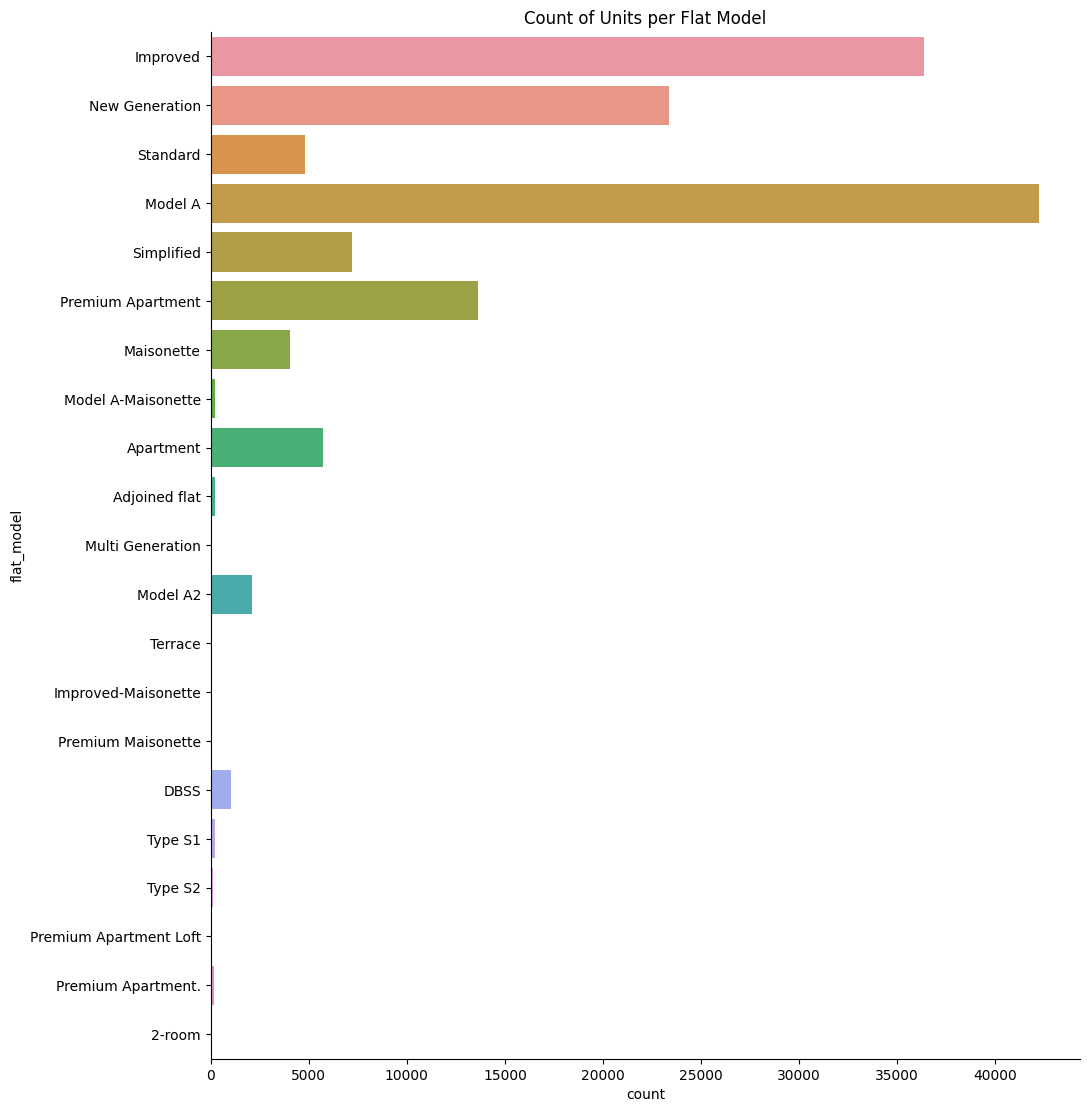

In [6]:
### Analyze flat_model

sns.catplot(y='flat_model',
            kind='count',
            height=11,
            aspect=1.0,
            order = df['flat_model'].unique(),
            data=df)
plt.title("Count of Units per Flat Model")
plt.show()

In [7]:
df['flat_type'].unique()

array(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE',
       'MULTI-GENERATION', '1 ROOM'], dtype=object)

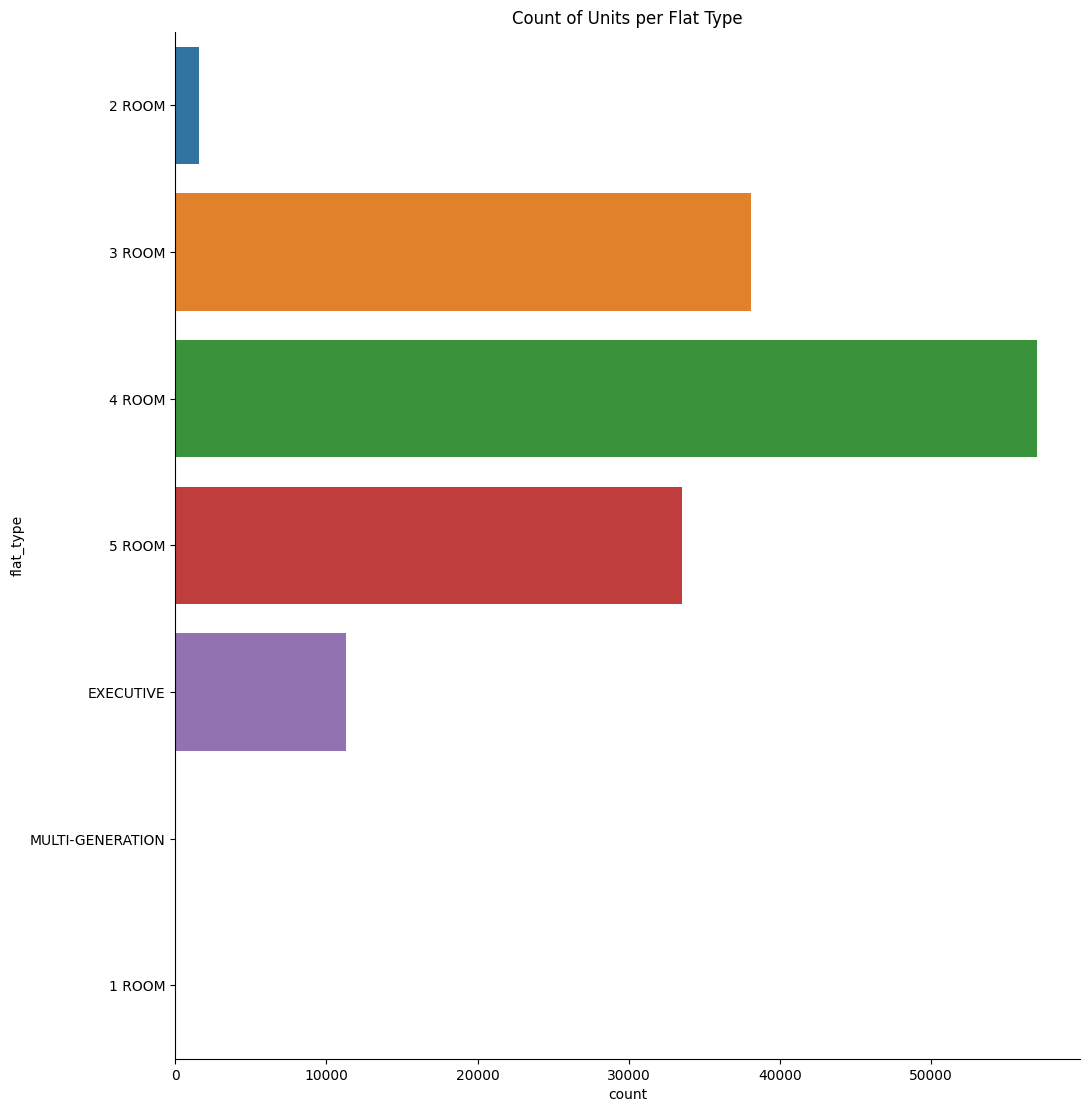

In [8]:
### Analyze flat_type

sns.catplot(y='flat_type',
            kind='count',
            height=11,
            aspect=1.0,
            order = df['flat_type'].unique(),
            data=df)
plt.title("Count of Units per Flat Type")
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Improved'),
  Text(1, 0, 'New Generation'),
  Text(2, 0, 'Standard'),
  Text(3, 0, 'Model A'),
  Text(4, 0, 'Simplified'),
  Text(5, 0, 'Premium Apartment'),
  Text(6, 0, 'Maisonette'),
  Text(7, 0, 'Model A-Maisonette'),
  Text(8, 0, 'Apartment'),
  Text(9, 0, 'Adjoined flat'),
  Text(10, 0, 'Multi Generation'),
  Text(11, 0, 'Model A2'),
  Text(12, 0, 'Terrace'),
  Text(13, 0, 'Improved-Maisonette'),
  Text(14, 0, 'Premium Maisonette'),
  Text(15, 0, 'DBSS'),
  Text(16, 0, 'Type S1'),
  Text(17, 0, 'Type S2'),
  Text(18, 0, 'Premium Apartment Loft'),
  Text(19, 0, 'Premium Apartment.'),
  Text(20, 0, '2-room')])

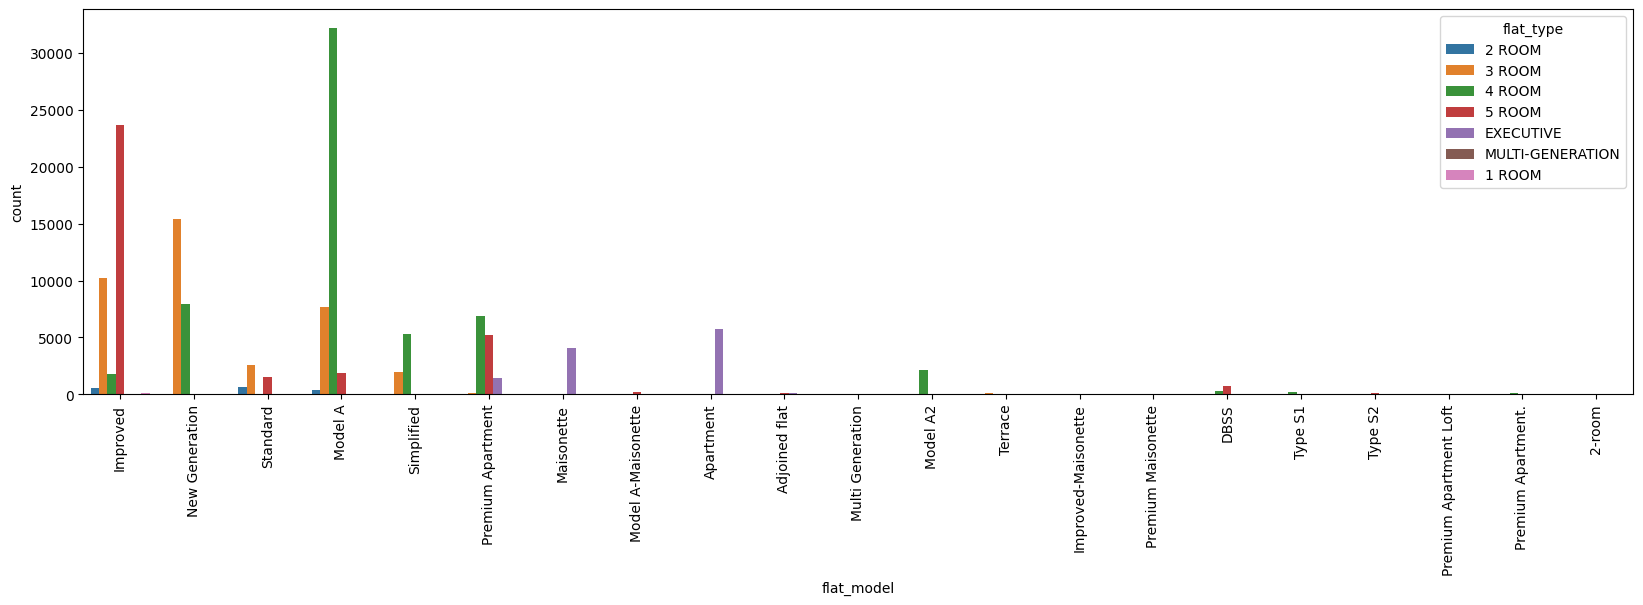

In [9]:
plt.figure(figsize=(20,5))
sns.countplot(df, x="flat_model",hue='flat_type')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Flat Type: Floor Area Vs. Resale Price')

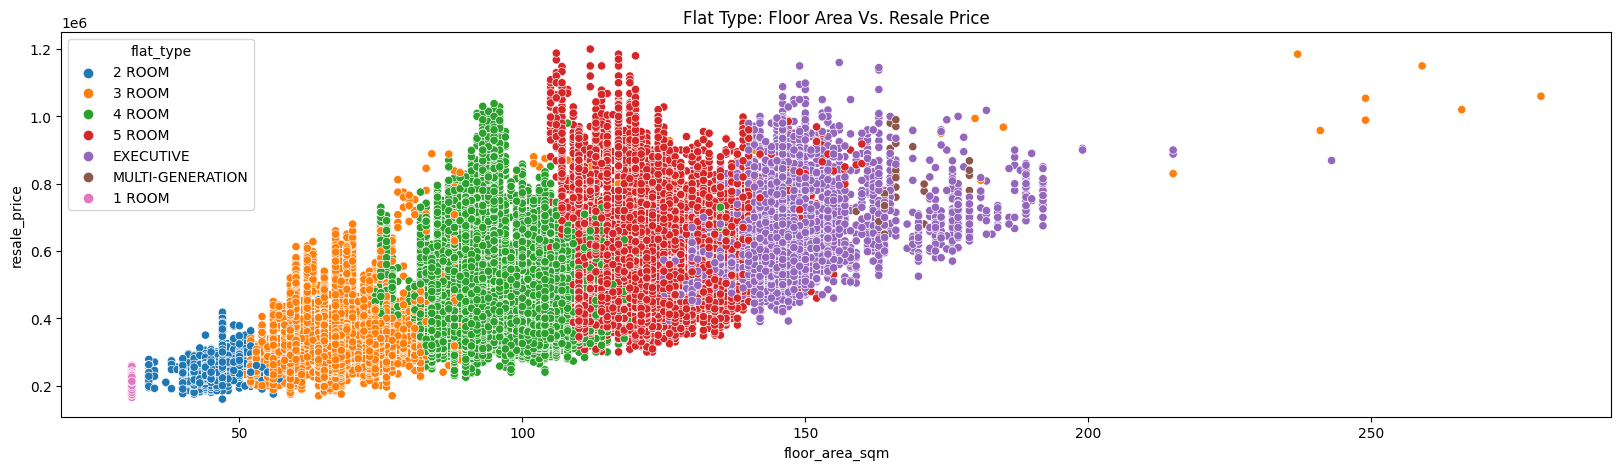

In [10]:
# Area per square meter vs. resell price
#sns.catplot(df, x='floor_area_sqm', y='resale_price', kind='point')
plt.figure(figsize=(20,5))
sns.scatterplot(x='floor_area_sqm', y='resale_price', data = df, hue = 'flat_type')
plt.title("Flat Type: Floor Area Vs. Resale Price")


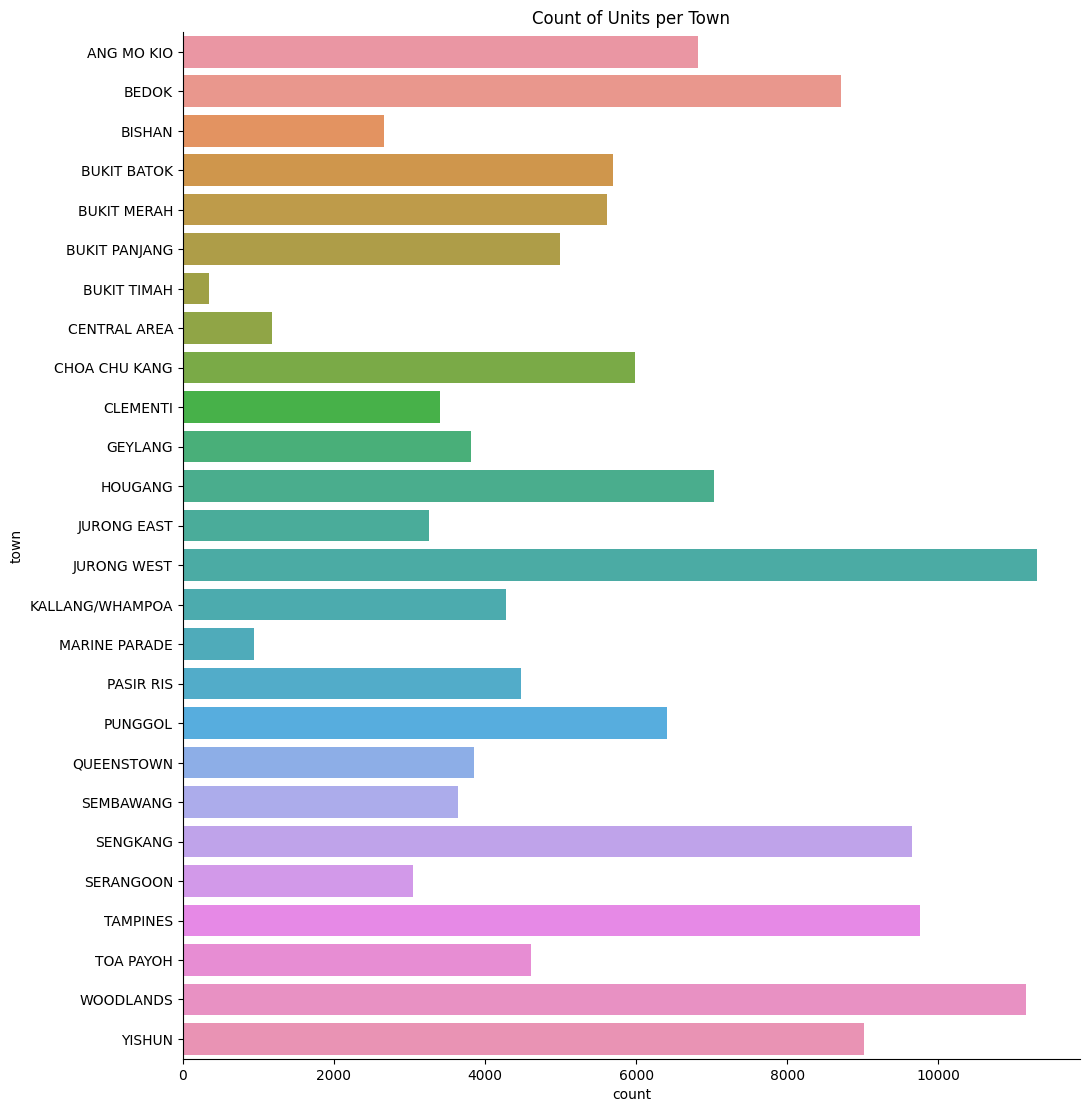

In [28]:
#Analyze Town

sns.catplot(y='town',
            kind='count',
            height=11,
            aspect=1.0,
            order = df['town'].unique(),
            data=df)
plt.title("Count of Units per Town")
plt.show()

Text(0.5, 1.0, 'Flat Type: Floor Area Vs. Resale Price')

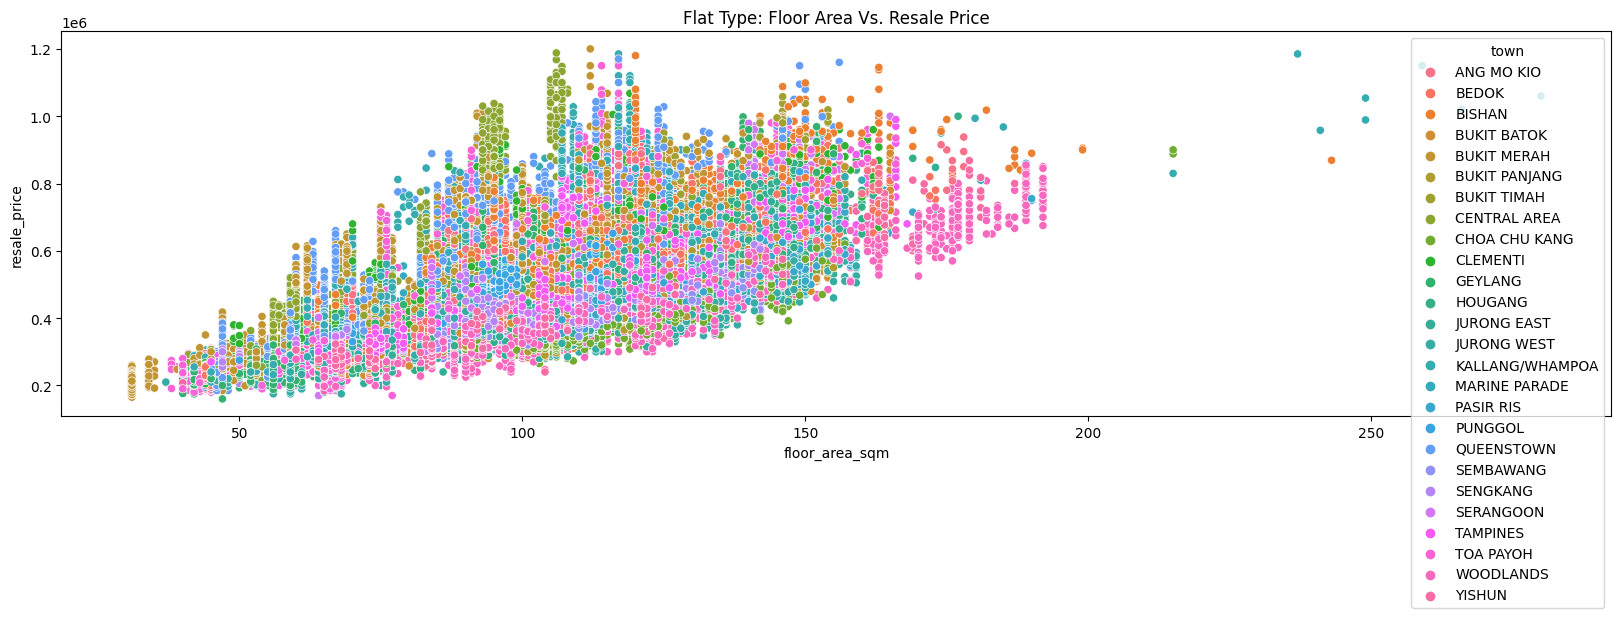

In [43]:
# Area per square meter vs. resell price
#sns.catplot(df, x='floor_area_sqm', y='resale_price', kind='point')
plt.figure(figsize=(20,5))
sns.scatterplot(x='floor_area_sqm', y='resale_price', data = df, hue = 'town')
plt.title("Flat Type: Floor Area Vs. Resale Price")

Text(0.5, 1.0, 'Jurong West: Floor Area Vs. Resale Price')

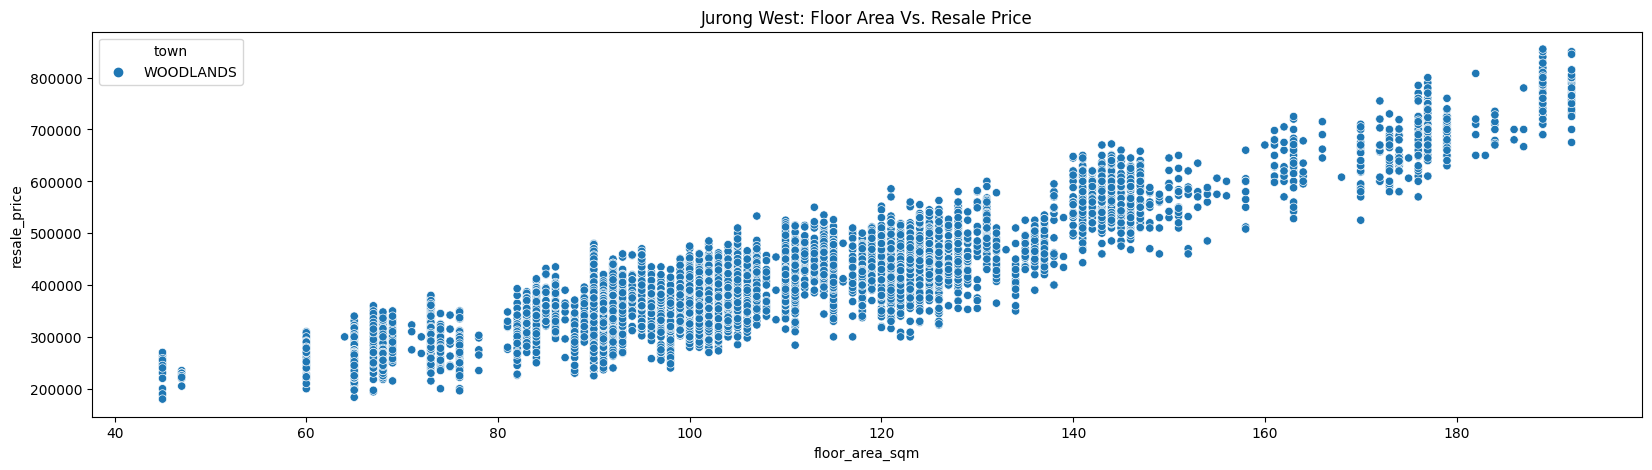

In [39]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='floor_area_sqm', y='resale_price', data = df[df['town']=='WOODLANDS'], hue = 'town')
plt.title("Jurong West: Floor Area Vs. Resale Price")

In [44]:
df.storey_range.unique()

array(['06 TO 10', '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25',
       '26 TO 30', '36 TO 40', '31 TO 35', '04 TO 06', '01 TO 03',
       '07 TO 09', '10 TO 12', '13 TO 15', '19 TO 21', '22 TO 24',
       '16 TO 18', '25 TO 27', '28 TO 30', '37 TO 39', '34 TO 36',
       '31 TO 33', '40 TO 42', '49 TO 51', '46 TO 48', '43 TO 45'],
      dtype=object)

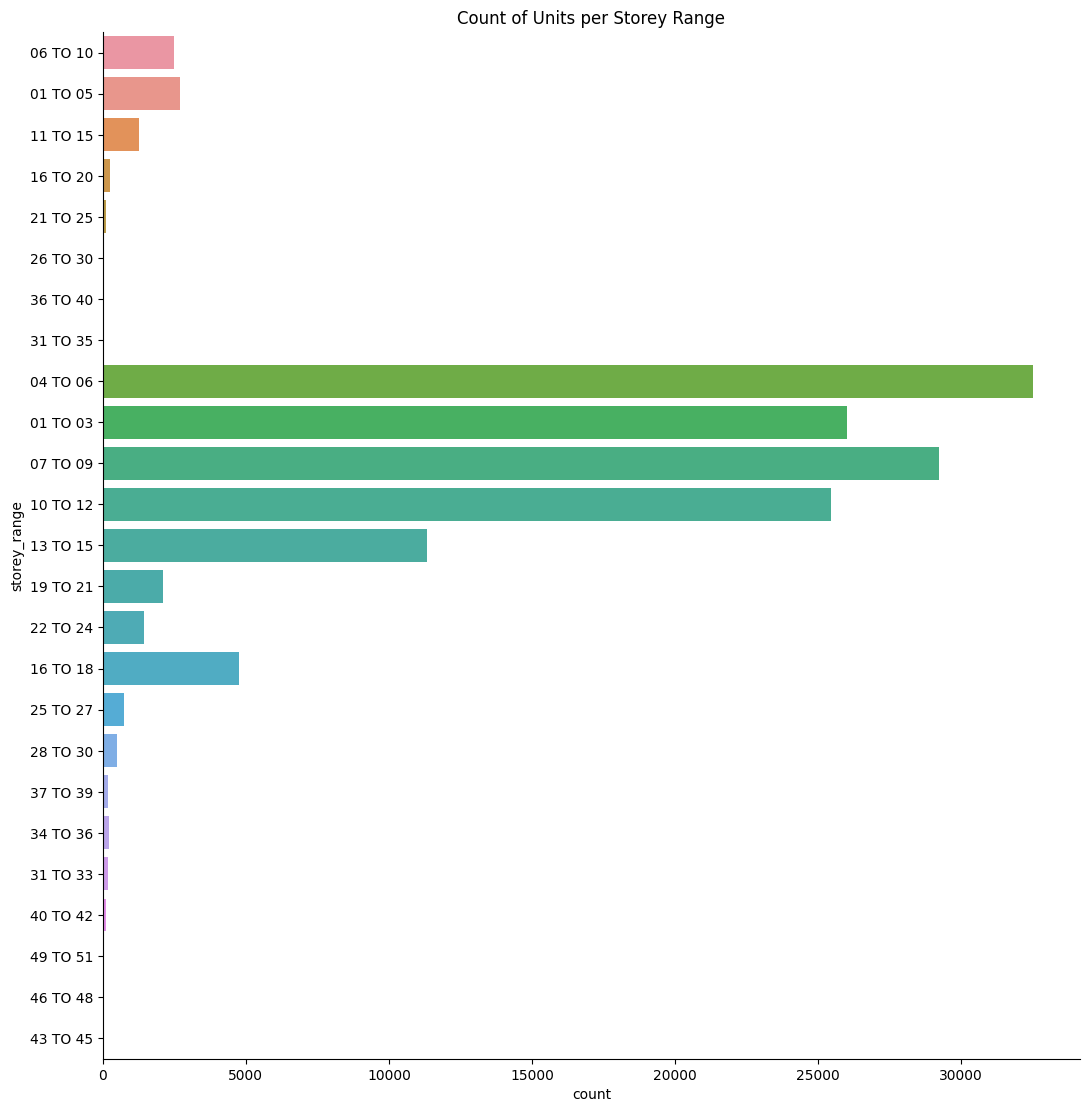

In [48]:
#Analyze Storey Range

sns.catplot(y='storey_range',
            kind='count',
            height=11,
            aspect=1.0,
            order = df['storey_range'].unique(),
            data=df)
plt.title("Count of Units per Storey Range")
plt.show()

In [49]:
df.remaining_lease.unique()

array([0, '61 years 04 months', '60 years 07 months',
       '62 years 05 months', '62 years 01 month', '63 years',
       '61 years 06 months', '58 years 04 months', '59 years 08 months',
       '59 years 06 months', '60 years', '62 years 08 months', '61 years',
       '60 years 10 months', '59 years 03 months', '61 years 05 months',
       '60 years 04 months', '62 years', '60 years 03 months',
       '63 years 09 months', '61 years 01 month', '61 years 10 months',
       '58 years 06 months', '59 years 04 months', '62 years 11 months',
       '60 years 08 months', '93 years 08 months', '93 years 07 months',
       '60 years 01 month', '94 years 08 months', '78 years 04 months',
       '60 years 06 months', '62 years 06 months', '58 years',
       '70 years 08 months', '63 years 04 months', '63 years 06 months',
       '67 years 07 months', '61 years 07 months', '68 years 02 months',
       '68 years 03 months', '56 years', '67 years 09 months',
       '67 years 05 months', '63 years

In [51]:
import re
a = '62 years 05 months'
b = re.findall('\d+')

TypeError: findall() missing 1 required positional argument: 'string'

In [54]:
df['remaining_lease'] = df['remaining_lease'].apply(lambda x: str(x).split(" ")[0])

In [55]:
df.remaining_lease.unique()

array(['0', '61', '60', '62', '63', '58', '59', '93', '94', '78', '70',
       '67', '68', '56', '66', '65', '69', '64', '83', '87', '71', '92',
       '54', '82', '75', '55', '74', '72', '80', '86', '79', '53', '57',
       '52', '51', '95', '90', '81', '85', '84', '77', '88', '49', '50',
       '89', '73', '48', '76', '91', '96', '47', '46', '97'], dtype=object)

In [57]:
df.remaining_lease.isnull().sum()

0

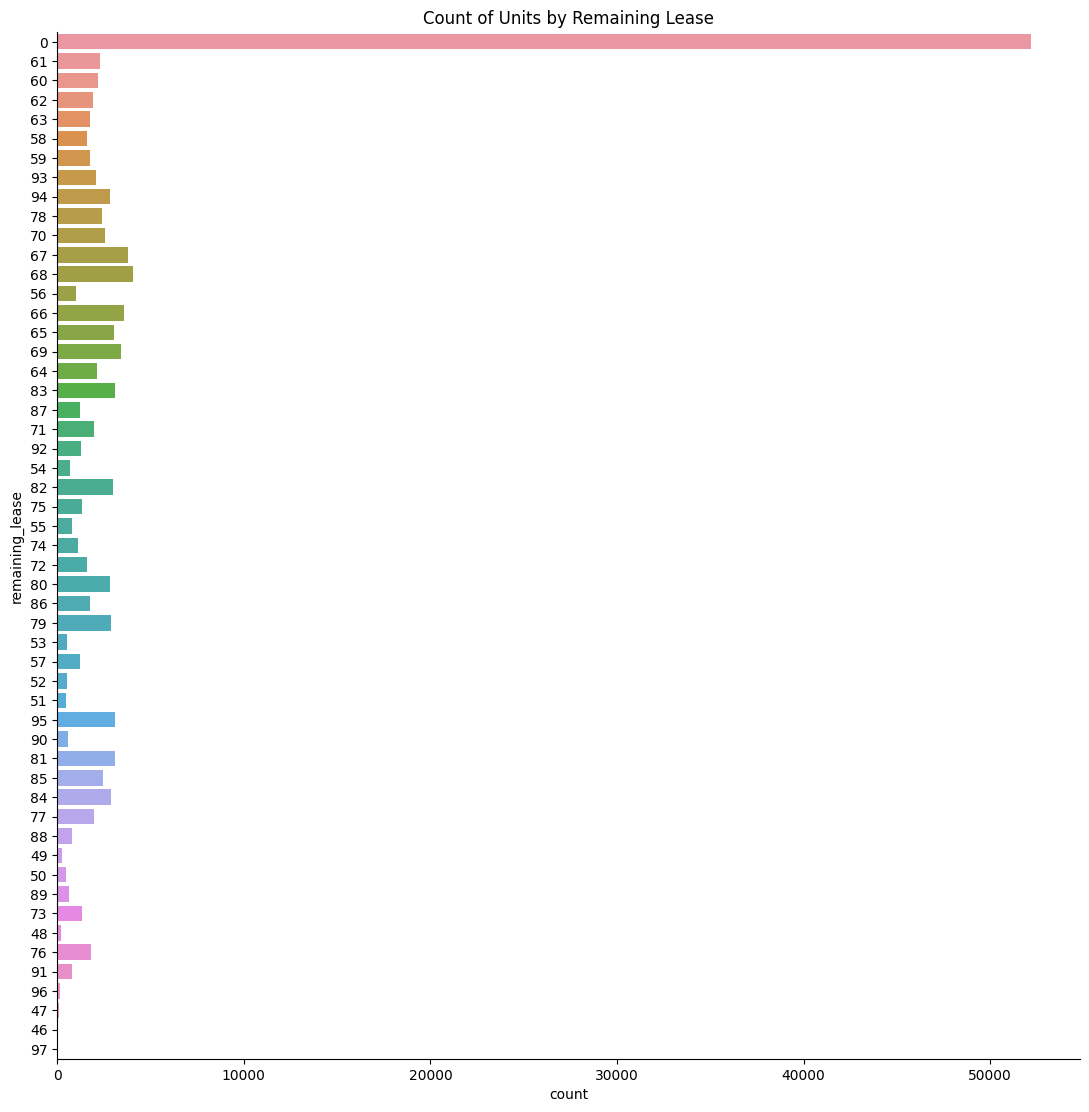

In [58]:
sns.catplot(y='remaining_lease',
            kind='count',
            height=11,
            aspect=1.0,
            order = df['remaining_lease'].unique(),
            data=df)
plt.title("Count of Units by Remaining Lease")
plt.show()

Text(0.5, 1.0, 'Flat Type: Floor Area Vs. Resale Price')

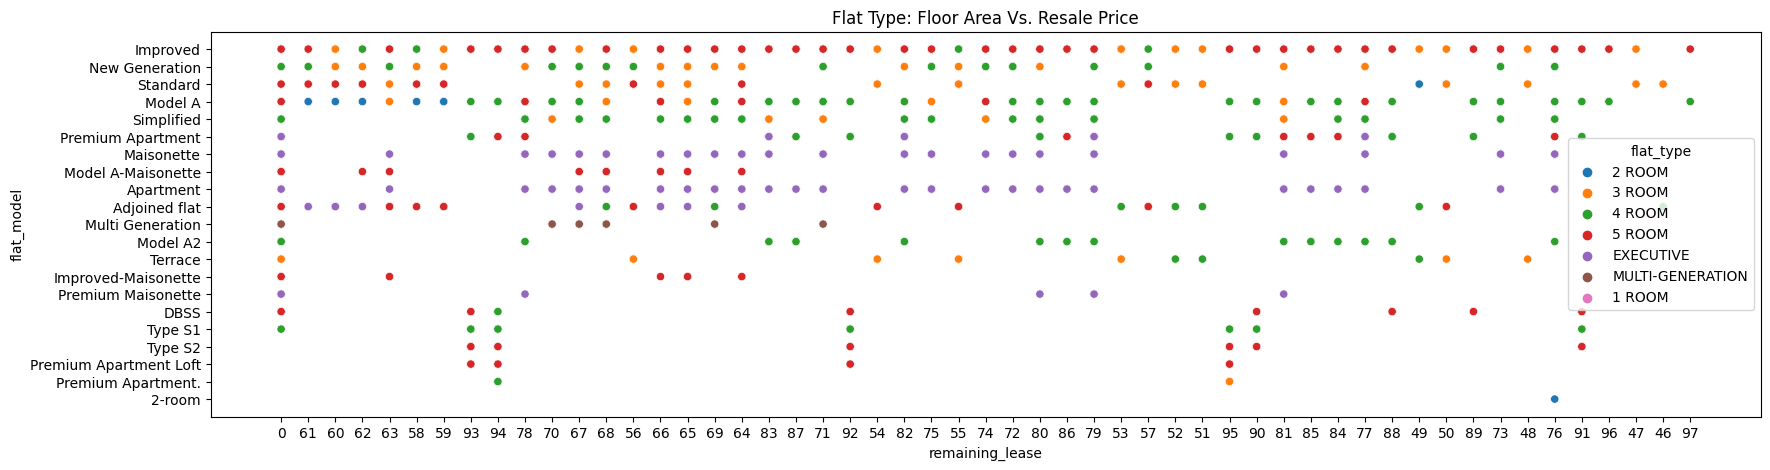

In [59]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='remaining_lease', y='flat_model', data = df, hue = 'flat_type')
plt.title("Flat Type: Floor Area Vs. Resale Price")
